In [1]:
import pandas as pd
import csv
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from time import gmtime, strftime
from plotly.subplots import make_subplots
import plotly.offline as py
import json
from os import listdir
from tkinter import Tcl

# pd.set_option('display.max_rows', 500)
py.init_notebook_mode(connected=True)

datasetpath = 'https://raw.githubusercontent.com/fcampos300/covid19/master/dataset/'

<p><img src="https://github.com/fcampos300/covid19/blob/master/covid19.jpg?raw=true" alt="covid19.jpg"></p>

# O que é o COVID-19?

COVID-19 (do inglês Coronavirus Disease 2019) é uma doença infeciosa causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). Os sintomas mais comuns são febre, tosse seca e cansaço. Entre outros sintomas menos comuns estão dores musculares, dor de garganta, dor de cabeça, congestão nasal, conjuntivite, perda do olfato e do paladar, erupções cutâneas na pele ou dedos de tom azul. Cerca de 80% dos casos confirmados são ligeiros ou assintomáticos e a maioria recupera sem sequelas. No entanto, 15% são infeções graves que necessitam de oxigénio e 5% são infeções muito graves que necessitam de ventilação assistida em ambiente hospitalar. Os casos mais graves podem evoluir para pneumonia grave com insuficiência respiratória grave, septicémia, falência de vários órgãos e morte. Entre os sinais de agravamento da doença estão a falta de ar, dor ou pressão no peito ou perturbações na fala e no movimento. O agravamento pode ser súbito, ocorre geralmente durante a segunda semana e requer atenção médica urgente.

A doença transmite-se através de gotículas produzidas nas vias respiratórias das pessoas infetadas. Ao espirrar ou tossir, estas gotículas podem ser inaladas ou atingir diretamente a boca, nariz ou olhos de pessoas em contacto próximo. Estas gotículas podem também depositar-se em objetos e superfícies próximos que podem infetar quem nelas toque e leve a mão aos olhos, nariz ou boca, embora esta forma de transmissão seja menos comum. O intervalo de tempo entre a exposição ao vírus e o início dos sintomas é de 2 a 14 dias, sendo em média 5 dias. Entre os fatores de risco estão a idade avançada e doenças crónicas graves como doenças cardiovasculares, diabetes ou doenças pulmonares. O diagnóstico é suspeito com base nos sintomas e fatores de risco e confirmado com ensaios em tempo real de reação em cadeia de polimerase para deteção de ARN do vírus em amostras de muco ou de sangue.

Entre as medidas de prevenção estão a lavagem frequente das mãos, evitar o contacto próximo com outras pessoas e evitar tocar com as mãos na cara. A utilização de máscaras cirúrgicas é recomendada apenas para pessoas suspeitas de estar infetadas ou para os cuidadores de pessoas infetadas. Não existe vacina ou tratamento antiviral específico para a doença. O tratamento consiste no alívio dos sintomas e cuidados de apoio. As pessoas com casos ligeiros conseguem recuperar em casa. Os antibióticos não têm efeito contra vírus.

O SARS-CoV-2 foi identificado pela primeira vez em seres humanos em dezembro de 2019 na cidade de Wuhan, na China. Pensa-se que o SARS-CoV-2 seja de origem animal. O surto inicial deu origem a uma pandemia global que à data de 22 de maio de 2020 tinha resultado em 5 097 944 casos confirmados e 332 425 mortes em todo o mundo. Os coronavírus são uma grande família de vírus que causam várias doenças respiratórias, desde doenças ligeiras como a constipação até doenças mais graves como a síndrome respiratória aguda grave (SARS). Entre outras epidemias causadas por coronavírus estão a epidemia de SARS em 2002-2003 e a epidemia de síndrome respiratória do Médio Oriente (MERS) em 2012.
<font size="1">Descrição retirada do Wikipédia - https://pt.wikipedia.org/wiki/COVID-19</font>

# **Objetivo desse Notebook**

Coletar dados (diferentes fontes) sobre a doença e organizar em um Data Frame que permita analisar o avanço do vírus ao redor do mundo, e em especial, no Brasil.

# **DataFrame - Nível Global**

In [2]:
dataset_url = 'https://raw.githubusercontent.com/fcampos300/covid19/master/dataset/daily_report.csv'

df_global = pd.read_csv(dataset_url, delimiter=",")
df_global.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-05-22 02:36:51   
1  22001.0     Acadia       Louisiana             US  2020-05-22 02:36:51   
2  51001.0   Accomack        Virginia             US  2020-05-22 02:36:51   
3  16001.0        Ada           Idaho             US  2020-05-22 02:36:51   
4  19001.0      Adair            Iowa             US  2020-05-22 02:36:51   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707         36       0          0      36   
1  30.295065  -92.414197        269      15          0     254   
2  37.767072  -75.632346        709      11          0     698   
3  43.452658 -116.241552        792      23          0     769   
4  41.330756  -94.471059          6       0          0       6   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [3]:
df_ww = df_global
df_ww = df_ww.drop(['FIPS', 'Admin2', 'Province_State', 'Last_Update', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_ww = df_ww.groupby(['Country_Region']).sum()[['Confirmed', 'Deaths', 'Recovered', 'Active']]
df_ww = df_ww.sort_values(['Confirmed'], ascending=False).reset_index()

df_ww['Mortality'] = np.round((df_ww.Deaths / df_ww.Confirmed) * 100, 2)

**Variáreis que serão utilizadas nas análises.**

In [4]:
global_confirmed = df_ww.Confirmed.sum()
global_deaths = df_ww.Deaths.sum()
global_recovered = df_ww.Recovered.sum()
global_active = df_ww.Active.sum()
global_mortality = global_deaths / global_confirmed

# **Análises Nível Global**

In [5]:
df_filt = df_ww.copy()
df_filt = df_filt.set_index('Country_Region')
df_filt = df_filt.head(20)  

df_filt = df_filt.style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                       .background_gradient(cmap='Reds',subset=["Deaths"])\
                       .background_gradient(cmap='Greens',subset=["Recovered"])\
                       .background_gradient(cmap='Blues',subset=["Active"])\
                       .background_gradient(cmap='Reds',subset=["Mortality"])\
                       .format("{:.2f}", subset=["Mortality"])\

df_filt

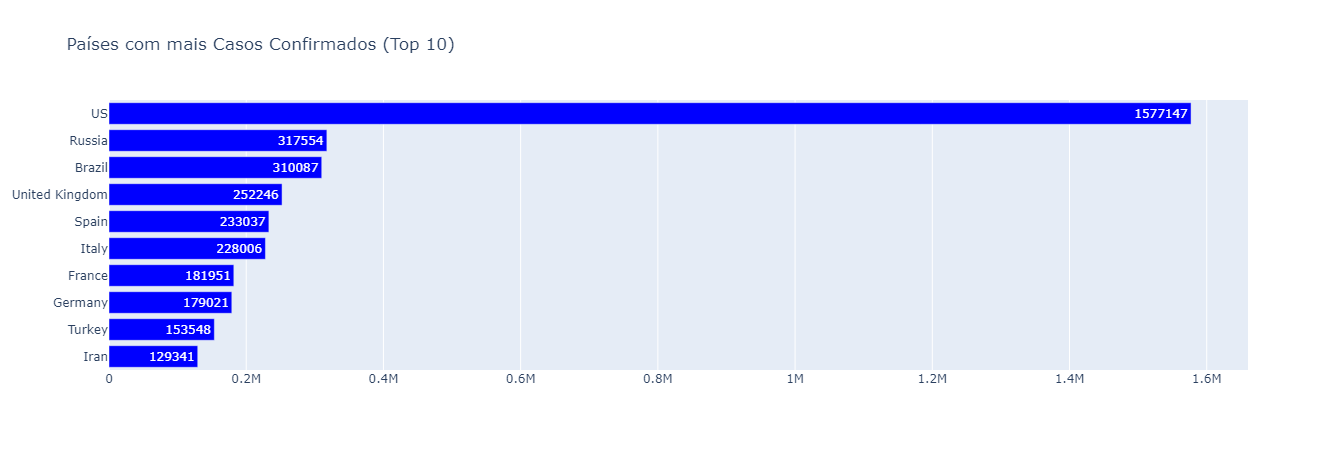

In [6]:
df_filt = df_ww.copy()
df_filt = df_filt.head(10)

fig = go.Figure(data=[
    go.Bar(name='Confirmed', 
           x=df_filt.Confirmed, 
           y=df_filt.Country_Region,
           orientation='h',
           text=df_filt.Confirmed,
           textposition='auto',
           hoverinfo='none',
           marker={'color': 'blue'})
])

fig.update_layout(title=f"Países com mais Casos Confirmados (Top 10)",
                  yaxis=dict(autorange="reversed"))

fig.show()

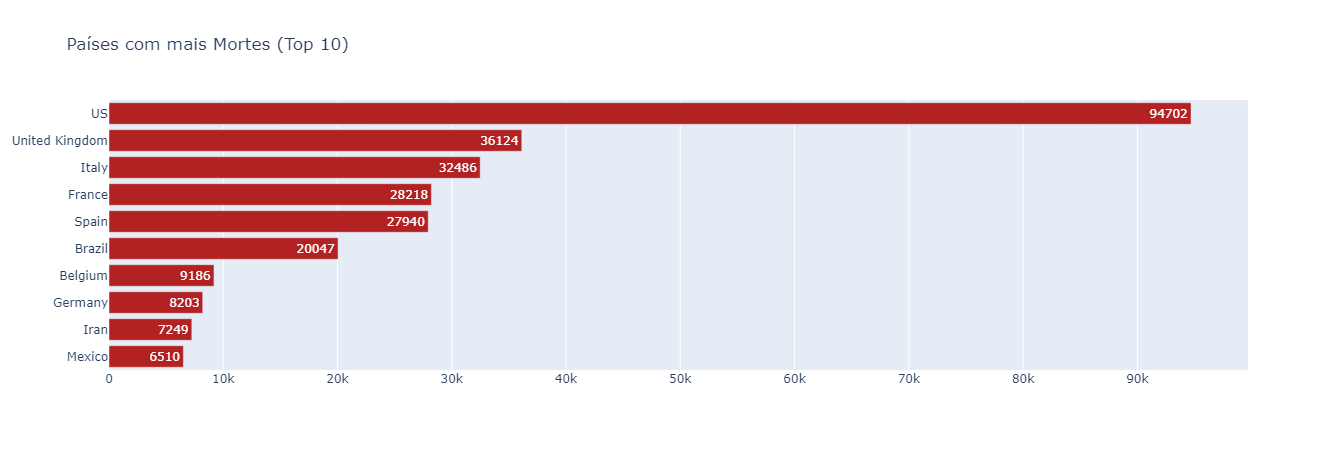

In [7]:
df_filt = df_ww.copy()
df_filt = df_filt.sort_values(['Deaths'], ascending=False)
df_filt = df_filt.head(10)

fig = go.Figure(data=[
    go.Bar(name='Deaths', 
           x=df_filt.Deaths, 
           y=df_filt.Country_Region,
           orientation='h',
           text=df_filt.Deaths,
           textposition='auto',
           hoverinfo='none',
           marker={'color': 'firebrick'})
])

fig.update_layout(title=f"Países com mais Mortes (Top 10)",
                  yaxis=dict(autorange="reversed"))

fig.show()

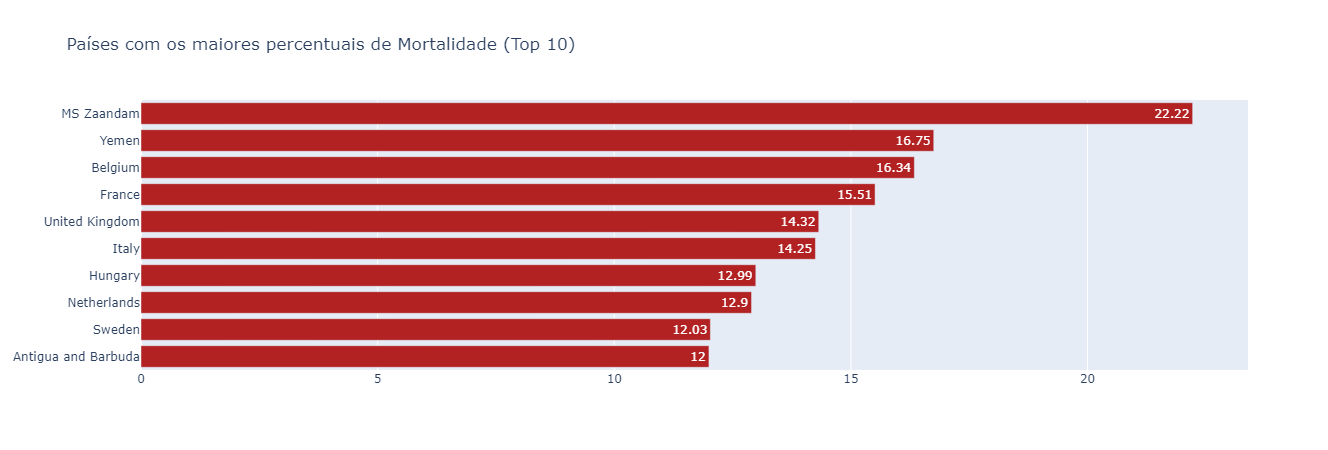

In [8]:
df_filt = df_ww.copy()
df_filt = df_filt.sort_values(['Mortality'], ascending=False)
df_filt = df_filt.head(10)

fig = go.Figure(data=[
    go.Bar(name='Mortality', 
           x=df_filt.Mortality, 
           y=df_filt.Country_Region,
           orientation='h',
           text=df_filt.Mortality,
           textposition='auto',
           hoverinfo='none',
           marker={'color': 'firebrick'})
])

fig.update_layout(title=f"Países com os maiores percentuais de Mortalidade (Top 10)",
                  yaxis=dict(autorange="reversed"))

fig.show()

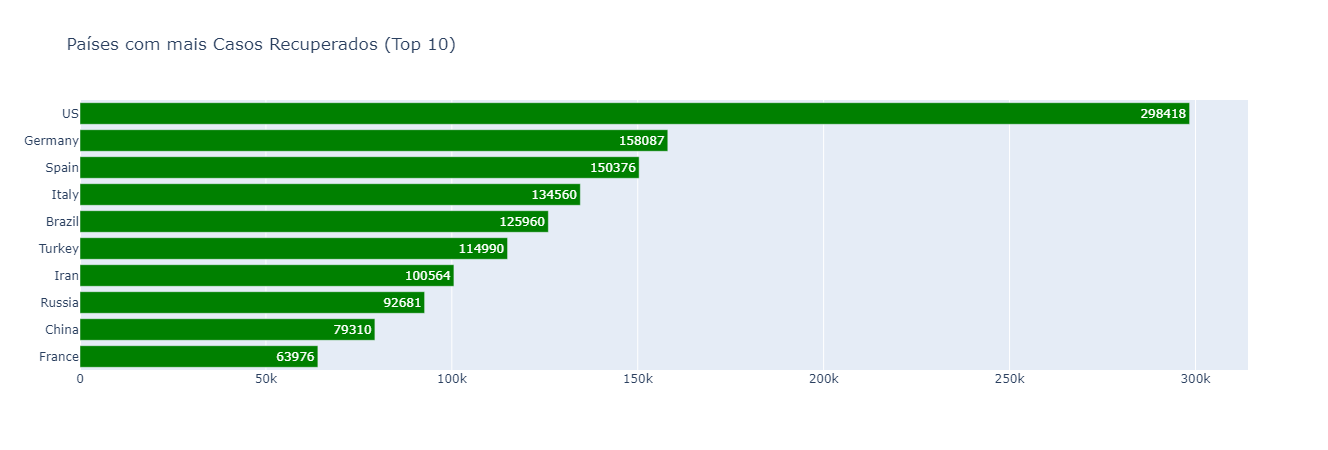

In [9]:
df_filt = df_ww.copy()
df_filt = df_filt.sort_values(['Recovered'], ascending=False)
df_filt = df_filt.head(10)

fig = go.Figure(data=[
    go.Bar(name='Recovered', 
           x=df_filt.Recovered, 
           y=df_filt.Country_Region,
           orientation='h',
           text=df_filt.Recovered,
           textposition='auto',
           hoverinfo='none',
           marker={'color': 'green'})
])

fig.update_layout(title=f"Países com mais Casos Recuperados (Top 10)",
                  yaxis=dict(autorange="reversed"))

fig.show()

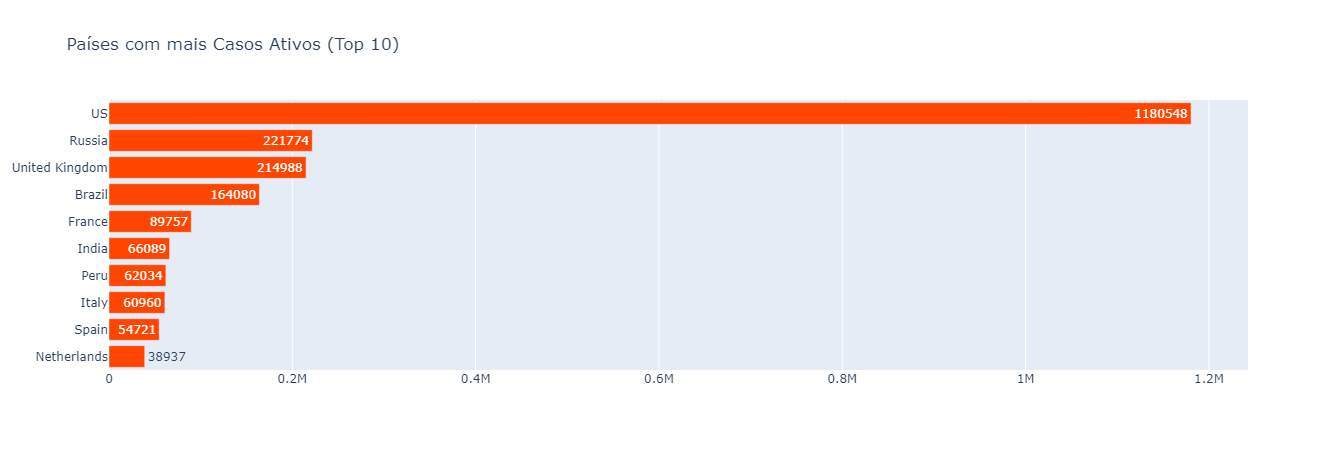

In [10]:
df_filt = df_ww.copy()
df_filt = df_filt.sort_values(['Active'], ascending=False)
df_filt = df_filt.head(10)

fig = go.Figure(data=[
    go.Bar(name='Active', 
           x=df_filt.Active, 
           y=df_filt.Country_Region,
           orientation='h',
           text=df_filt.Active,
           textposition='auto',
           hoverinfo='none',
           marker={'color': 'orangered'})
])

fig.update_layout(title=f"Países com mais Casos Ativos (Top 10)",
                  yaxis=dict(autorange="reversed"))

fig.show()

# **DataFrame - Nível Brasil**

**Etapas de Preparação dos Dados:**

1.   Ordena o DF por estado, região e data: Necessário para pegar a diferença entre as linhas das colunas ***cases*** e ***deaths***;
2.   Adiciona a coluna calculada ***new_cases*** para novos casos: Busca a diferença entre a linha atual e a linha anterior da coluna ***cases***, onde os estados são iguais;
3.   Adiciona a coluna calculada ***new_deaths***  para novas mortes: Busca a diferença entre a linha atual e a linha anterior da coluna ***deaths***, onde os estados são iguais;
4.   Adiciona a coluna ***uf***: Adiciona a UF do estado de acordo com a variável mapeada UF;
5.   Converte a coluna data de *str* para *datetime*: Necessário para criar novas variáveis a partir da coluna;
6.   Cria novas colunas no DataFrame;
> * **Year**: Ano (year) indicado na coluna date.
> * **Month**: Mês (month) indicado na coluna date.
> * **Dayofweek**: Dia da semana (dayofweek) que pertence o dia indicado na coluna date.
> * **Weekofyear**: Número da semana (weekofyear) que pertence a data no ano.
> * **Weekend**: Coluna que indica se a data é um dia ou final de semana.
7.   Cria um novo DF com informações sobre a população nos estados brasileiros;
8.   Agrupa por região e estado e soma a coluna população;
5.   Junta os dois DFs;

In [11]:
df = pd.read_csv(datasetpath + 'brazil_covid19.csv', delimiter=",")
df = df.sort_values(['state', 'region', 'date'])

# Adiciona as colunas com casos/mortes novas por dia.
df['new_cases'] = np.where(df.state.eq(df.state.shift()), df.cases.diff(), 1)
df['new_deaths'] = np.where(df.state.eq(df.state.shift()), df.deaths.diff(), 1)

# Adiciona a coluna UF ao DataFrame.
UF = {'Acre':'AC',
      'Alagoas':'AL',
      'Amapá':'AP',
      'Amazonas':'AM',
      'Bahia':'BA',
      'Ceará':'CE',
      'Distrito Federal':'DF',
      'Espírito Santo':'ES',
      'Goiás':'GO',
      'Maranhão':'MA',
      'Mato Grosso':'MT',
      'Mato Grosso do Sul':'MS',
      'Minas Gerais': 'MG',
      'Pará':'PA',
      'Paraíba':'PB',
      'Paraná': 'PR',
      'Pernambuco':'PE',
      'Piauí':'PI',
      'Rio de Janeiro':'RJ',
      'Rio Grande do Norte':'RN',
      'Rio Grande do Sul':'RS',
      'Rondônia':'RO',
      'Roraima':'RR',
      'Santa Catarina':'SC',
      'São Paulo':'SP',
      'Sergipe':'SE',
      'Tocantins':'TO'}

df['uf'] = df.state.map(UF)

# Converte a coluna data de str para datetime.
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

# Cria novas colunas.
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["dayofweek"] = df.date.dt.dayofweek
df["weekofyear"] = df.date.dt.weekofyear
df["weekend"] = 0

df.loc[(df.dayofweek == 5) | (df.dayofweek == 6), 'weekend'] = 1

# Importa o dataset regiões/população.
df_pop = pd.read_csv(datasetpath + 'brazil_population_2019.csv', sep=",", error_bad_lines=False, index_col=False, warn_bad_lines=False)
df_pop = df_pop.groupby(['region', 'state']).sum()[['population']].reset_index()

df = pd.merge(df, df_pop, on=['region', 'state'])

df.tail()

date region      state  cases  deaths  new_cases  new_deaths  uf  \
1891 2020-05-18  Norte  Tocantins   1496      32      114.0         1.0  TO   
1892 2020-05-19  Norte  Tocantins   1646      38      150.0         6.0  TO   
1893 2020-05-20  Norte  Tocantins   1809      42      163.0         4.0  TO   
1894 2020-05-21  Norte  Tocantins   1976      47      167.0         5.0  TO   
1895 2020-05-22  Norte  Tocantins   2205      49      229.0         2.0  TO   

      year  month  dayofweek  weekofyear  weekend  population  
1891  2020      5          0          21        0     1110590  
1892  2020      5          1          21        0     1110590  
1893  2020      5          2          21        0     1110590  
1894  2020      5          3          21        0     1110590  
1895  2020      5          4          21        0     1110590

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1896 non-null   datetime64[ns]
 1   region      1896 non-null   object        
 2   state       1896 non-null   object        
 3   cases       1896 non-null   int64         
 4   deaths      1896 non-null   int64         
 5   new_cases   1896 non-null   float64       
 6   new_deaths  1896 non-null   float64       
 7   uf          1896 non-null   object        
 8   year        1896 non-null   int64         
 9   month       1896 non-null   int64         
 10  dayofweek   1896 non-null   int64         
 11  weekofyear  1896 non-null   int64         
 12  weekend     1896 non-null   int64         
 13  population  1896 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(3)
memory usage: 222.2+ KB


Cria um DataFrame, a partir do DF original, agrupado por Data e adiciona as colunas ***mortality***, ***Recovered*** e ***Monitoring***.

In [13]:
df_copy = df.copy()

# Cria um DF agregado por Data;
df_br = df_copy.groupby(['date']).sum()[['cases',
                                         'deaths',
                                       ]].reset_index()

df_br['new_cases'] = df_br.cases.diff()
df_br['new_deaths'] = df_br.deaths.diff()

# Importa o DF com as colunas recovered e monitoring.
df_macro = pd.read_csv(datasetpath + 'brazil_covid19_macro.csv', sep=",", error_bad_lines=False, index_col=False, warn_bad_lines=False)
# Converte a coluna data de str para datetime.
df_macro.date = pd.to_datetime(df_macro.date, format="%Y-%m-%d")
# Deleta todas as colunas desnecessárias.
df_macro = df_macro.drop(['week', 'cases', 'deaths', 'country'], axis=1)

df_br = pd.merge(df_br, df_macro, on=['date'])

df_br['mortality'] = df_br.deaths / df_br.cases

df_br.tail()

date   cases  deaths  new_cases  new_deaths  recovered  monitoring  \
82 2020-05-18  254220   16792    13140.0       674.0     100459      136969   
83 2020-05-19  271628   17971    17408.0      1179.0     106794      146863   
84 2020-05-20  291579   18859    19951.0       888.0     116683      156037   
85 2020-05-21  310087   20047    18508.0      1188.0     125960      164080   
86 2020-05-22  330890   21048    20803.0      1001.0     135430      174412   

    mortality  
82   0.066053  
83   0.066160  
84   0.064679  
85   0.064650  
86   0.063610

# **Variáveis que serão usadas nas análises**

In [14]:
min_date = min(df.date)
min_date_en = f'{min_date.year}-{min_date.month:02d}-{min_date.day:02d}'
min_date_br = f'{min_date.day:02d}/{min_date.month:02d}/{min_date.year}'

max_date = max(df.date)
max_date_en = f'{max_date.year}-{max_date.month:02d}-{max_date.day:02d}'
max_date_br = f'{max_date.day:02d}/{max_date.month:02d}/{max_date.year}'

last_update = df_br.date.iloc[-1]
last_update_en = f'{last_update.year}-{last_update.month:02d}-{last_update.day:02d}'
last_update_br = f'{last_update.day:02d}/{last_update.month:02d}/{last_update.year}'

first_case = df.sort_values(['date']).query('cases > 0').date.iloc[0]
first_case_en = f'{first_case.year}-{first_case.month:02d}-{first_case.day:02d}'
first_case_br = f'{first_case.day:02d}/{first_case.month:02d}/{first_case.year}'

first_death = df.sort_values(['date']).query('deaths > 0').date.iloc[0]
first_death_en = f'{first_death.year}-{first_death.month:02d}-{first_death.day:02d}'
first_death_br = f'{first_death.day:02d}/{first_death.month:02d}/{first_death.year}'

confirmed_cases = df_br.cases.iloc[-1]
confirmed_deaths = df_br.deaths.iloc[-1]

new_cases_today = df_br.new_cases.iloc[-1]
new_deaths_today = df_br.new_deaths.iloc[-1]

mortality_rate = round((confirmed_deaths / confirmed_cases) * 100, 2)

In [15]:
print(f"Última Atualização: {last_update_br}\n")
print(f"Data do Primeiro Caso Confirmado: {first_case_br}")
print(f"Data da primeira Morte: {first_death_br}\n")
print(f"Casos Acumulados: {confirmed_cases}")
print(f"Mortes Acumuladas: {confirmed_deaths}")
print(f"Taxa de Mortalidade: {mortality_rate}%\n")
print(f"Novos Casos Hoje em {last_update_br}: {int(new_cases_today)}")
print(f"Novas Mortes Hoje em {last_update_br}: {int(new_deaths_today)}")

Última Atualização: 22/05/2020

Data do Primeiro Caso Confirmado: 26/02/2020
Data da primeira Morte: 17/03/2020

Casos Acumulados: 330890
Mortes Acumuladas: 21048
Taxa de Mortalidade: 6.36%

Novos Casos Hoje em 22/05/2020: 20803
Novas Mortes Hoje em 22/05/2020: 1001


# **Verifica se existe colunas em branco no DF**

In [16]:
df.isnull().values.any()

False

In [17]:
df_br.isnull().values.any()

True

# **Verifica a correlação entra as colunas no DF**

In [18]:
# +1 = Forte correlação positiva.
#  0 = Não há correlação.
# -1 = Forte correlação negativa.
df.corr()

cases    deaths  new_cases  new_deaths  year     month  \
cases       1.000000  0.981366   0.868305    0.839318   NaN  0.379954   
deaths      0.981366  1.000000   0.848252    0.876344   NaN  0.319622   
new_cases   0.868305  0.848252   1.000000    0.824059   NaN  0.372154   
new_deaths  0.839318  0.876344   0.824059    1.000000   NaN  0.308268   
year             NaN       NaN        NaN         NaN   NaN       NaN   
month       0.379954  0.319622   0.372154    0.308268   NaN  1.000000   
dayofweek  -0.007350 -0.006047  -0.014992   -0.018829   NaN  0.009852   
weekofyear  0.411059  0.345034   0.406821    0.334277   NaN  0.925361   
weekend    -0.030965 -0.024694  -0.061811   -0.053642   NaN -0.023631   
population  0.472654  0.481113   0.405564    0.446623   NaN -0.090962   

            dayofweek  weekofyear   weekend  population  
cases       -0.007350    0.411059 -0.030965    0.472654  
deaths      -0.006047    0.345034 -0.024694    0.481113  
new_cases   -0.014992    0.406821 -0.061811    0.405564  
new_deaths  -0.018829    0.334277 -0.053642    0.446623  
year              NaN         NaN       NaN         NaN  
month        0.009852    0.925361 -0.023631   -0.090962  
dayofweek    1.000000   -0.117049  0.783273    0.000441  
weekofyear  -0.117049    1.000000 -0.120945   -0.109527  
weekend      0.783273   -0.120945  1.000000   -0.001178  
population   0.000441   -0.109527 -0.001178    1.000000

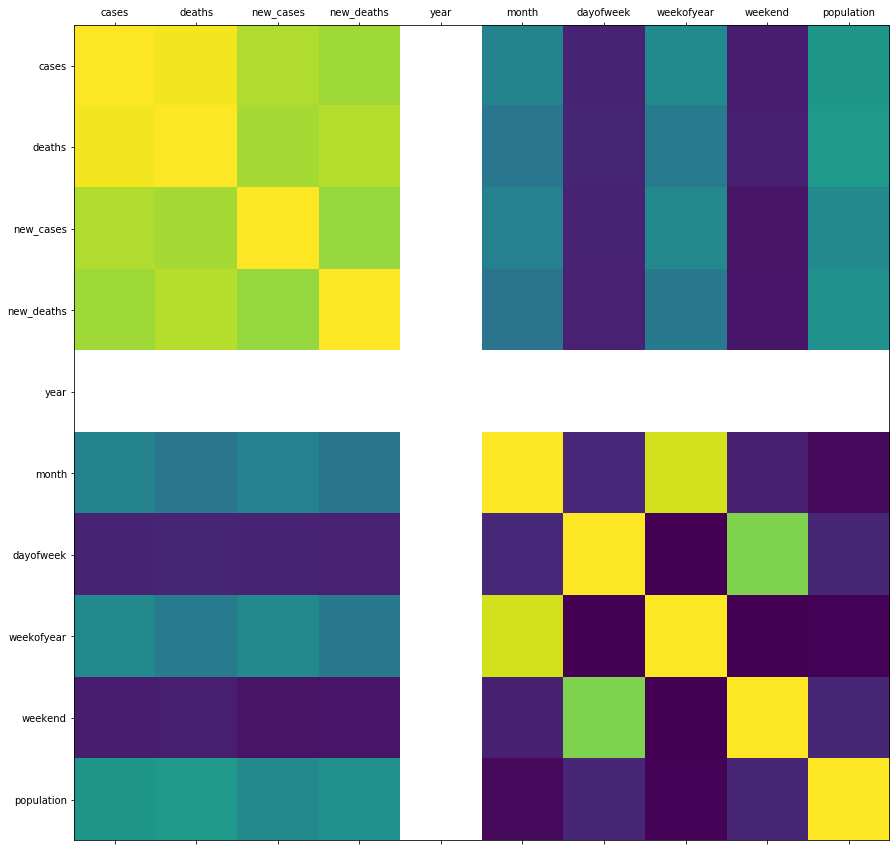

In [19]:
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

# **Análises Nível Brasil**

**Preparação dos dados:**


>* Faz uma cópia do DF original;
>* Cria um DF agregado por **Data**;
>>* Adiciona a coluna calculada **Taxa de Mortalidade**.
>>* Adiciona a coluna calculada **Percentual de Casos**.
>>* Adiciona a coluna calculada **Percentual de Mortes**.
>* Cria um DF agregado por **Mês**;
>>* Adiciona a coluna calculada **Taxa de Mortalidade**.
>>* Adiciona a coluna calculada **Percentual de Casos**.
>>* Adiciona a coluna calculada **Percentual de Mortes**.
>>* Converte a coluna **mês** (int) para o nome do **mês** (str) correspondente.
>* Cria um DF agregado por **Dia da Semana**;
>>* Adiciona a coluna calculada **Taxa de Mortalidade**.
>>* Adiciona a coluna calculada **Percentual de Casos**.
>>* Adiciona a coluna calculada **Percentual de Mortes**.
>>* Converte a coluna **dia da semana** (int - 0 a 6) para o nome do **dia da semana** (str - Segunda a Domingo) correspondente.
>* Cria um DF agregado por **Semana do Ano**;
>>* Adiciona a coluna calculada **Taxa de Mortalidade**.
>>* Adiciona a coluna calculada **Percentual de Casos**.
>>* Adiciona a coluna calculada **Percentual de Mortes**.
>* Cria um DF agregado por **Final de Semana**;
>>* Adiciona a coluna calculada **Taxa de Mortalidade**.
>>* Adiciona a coluna calculada **Percentual de Casos**.
>>* Adiciona a coluna calculada **Percentual de Mortes**.
>>* Converte a coluna **final de semana** (int - 0 e 1) para **dia de semana**, caso o valor seja 0 e **final se semana**, caso o valor seja 1. *

**Gráficos**

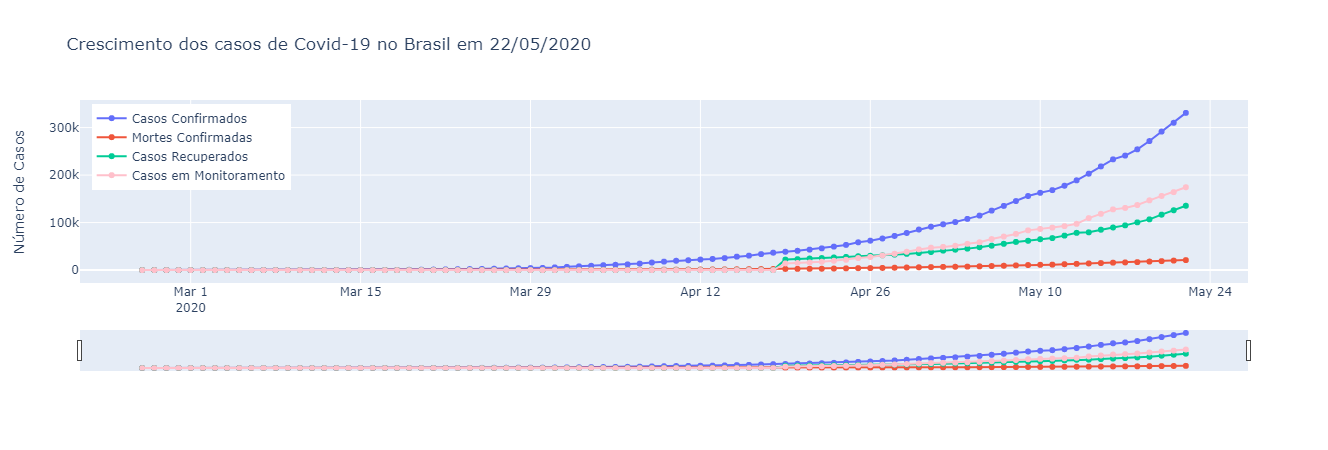

In [20]:
df_copy = df_br.copy()

date_x = df_copy['date']
confirmed_y = df_copy['cases']
mortes_y = df_copy['deaths']
recovered_y = df_copy['recovered']
monitoring_y = df_copy['monitoring']

fig = go.Figure()
fig.add_trace(go.Scatter(x=date_x, 
                         y=confirmed_y,
                         mode='lines+markers',
                         name='Casos Confirmados'))

fig.add_trace(go.Scatter(x=date_x, 
                         y=mortes_y,
                         mode='lines+markers',
                         name='Mortes Confirmadas'))

fig.add_trace(go.Scatter(x=date_x, 
                         y=recovered_y,
                         mode='lines+markers',
                         name='Casos Recuperados'))

fig.add_trace(go.Scatter(x=date_x, 
                         y=monitoring_y,
                         mode='lines+markers',
                         name='Casos em Monitoramento',
                         line=dict(color='Pink', width=2)))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title=f'Crescimento dos casos de Covid-19 no Brasil em {max_date_br}',
                  yaxis_title='Número de Casos', 
                  legend=dict(x=0.01,y=0.98))

fig.show()

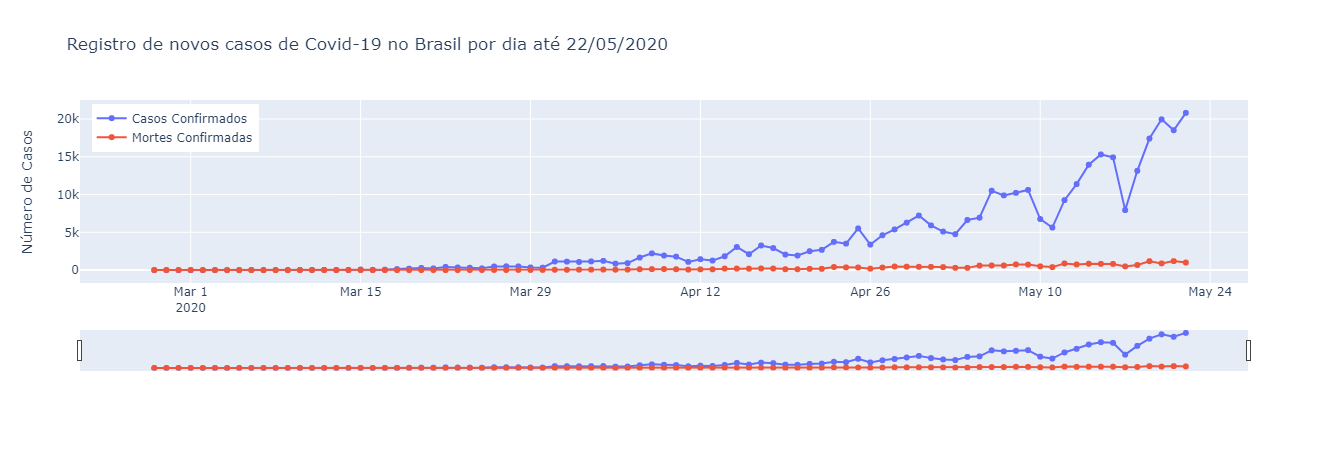

In [21]:
df_copy = df_br.copy()

date_x = df_copy['date']
confirmed_y = df_copy['new_cases']
mortes_y = df_copy['new_deaths']

# Criando as linhas
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_x, 
                         y=confirmed_y,
                         mode='lines+markers',
                         name='Casos Confirmados'))

fig.add_trace(go.Scatter(x=date_x, 
                         y=mortes_y,
                         mode='lines+markers',
                         name='Mortes Confirmadas'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title=f'Registro de novos casos de Covid-19 no Brasil por dia até {max_date_br}',
                  yaxis_title='Número de Casos',
                  legend=dict(x=0.01,y=0.98))

fig.show()

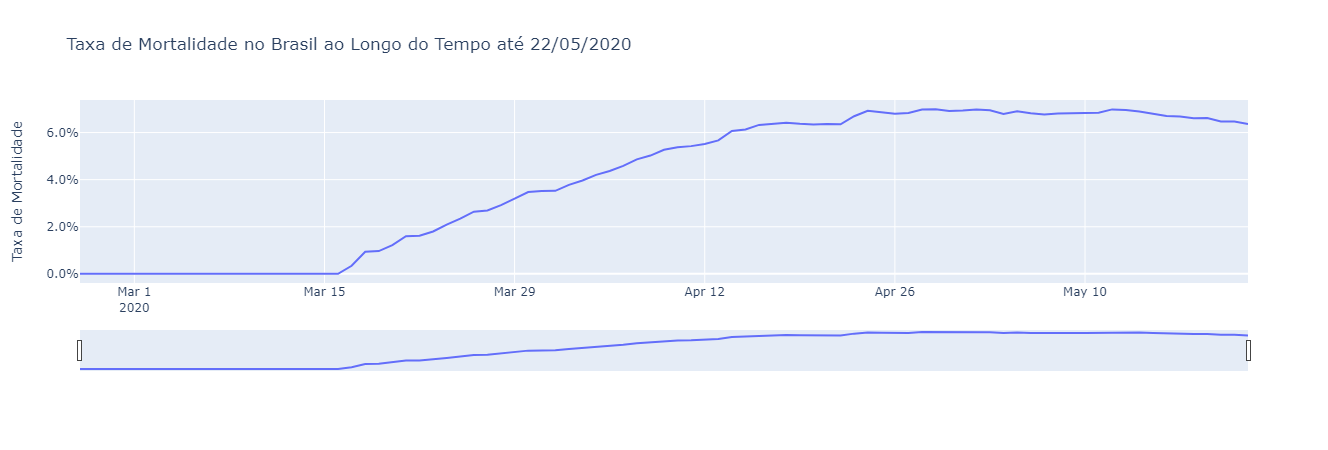

In [22]:
df_copy = df_br.copy()

date_x = df_copy['date']
rate_y = df_copy['mortality']

# Criando as linhas
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_x, y=rate_y,
                    mode='lines',
                    name='Mortalidade'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title= f"Taxa de Mortalidade no Brasil ao Longo do Tempo até {max_date_br}",
                  yaxis_title='Taxa de Mortalidade', 
                  yaxis_tickformat = '.1%')

fig.show()

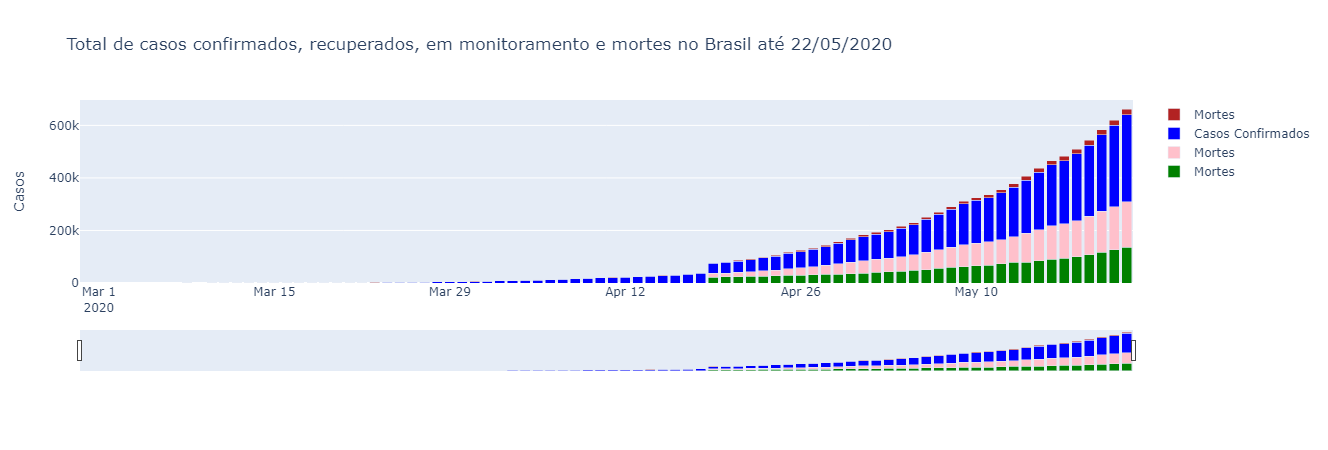

In [23]:
df_copy = df_br.copy()

df_copy = df_copy[(df_copy['new_cases'] > 0)]

colors = {'recovered':'green',
          'monitoring':'pink',
          'cases':'blue',
          'deaths':'firebrick'}

fig = go.Figure(data=[
    go.Bar(name='Mortes', 
           x=df_copy['date'], 
           y=df_copy['recovered'], 
           marker_color=colors['recovered']),
    go.Bar(name='Mortes', 
           x=df_copy['date'], 
           y=df_copy['monitoring'],
           marker_color=colors['monitoring']),
    go.Bar(name='Casos Confirmados', 
           x=df_copy['date'], 
           y=df_copy['cases'], 
           marker_color=colors['cases']),
    go.Bar(name='Mortes',
           x=df_copy['date'], 
           y=df_copy['deaths'], 
           marker_color=colors['deaths'])
])

fig.update_xaxes(rangeslider_visible=True)
fig.update_yaxes(title_text='Casos')
fig.update_layout(title= f"Total de casos confirmados, recuperados, em monitoramento e mortes no Brasil até {max_date_br}",
                  barmode='stack')

fig.show()

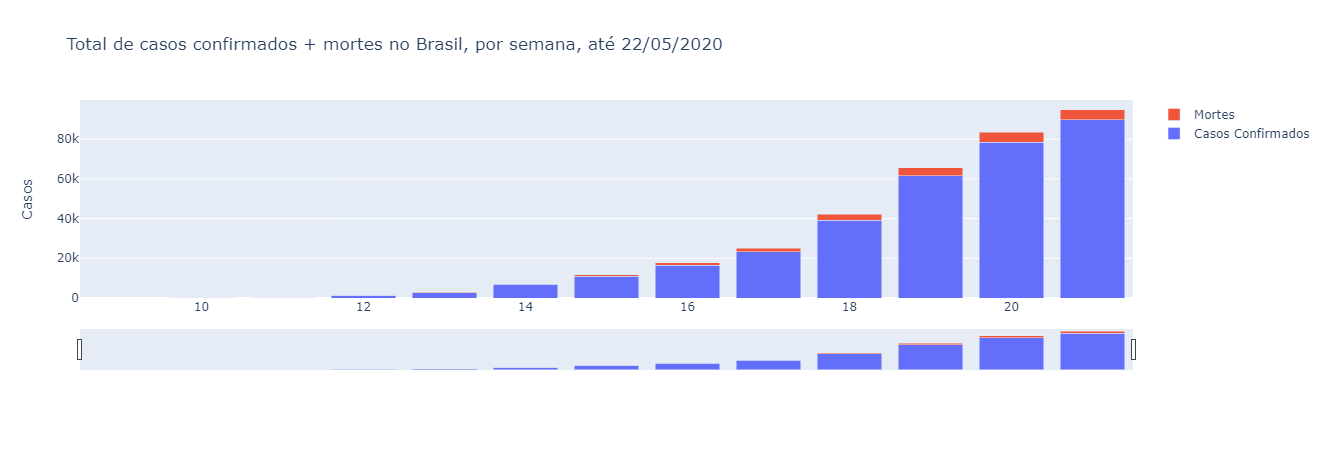

In [24]:
df_woy = df_br.copy()

df_woy["weekofyear"] = df_woy.date.dt.weekofyear
df_woy["new_cases"] = df_woy.new_cases.fillna(1)
df_woy["new_deaths"] = df_woy.new_deaths.fillna(0)
df_woy = df_woy.groupby(['weekofyear']).sum()[['new_cases',
                                               'new_deaths']].reset_index()

df_woy = df_woy[(df_woy['new_cases'] > 0)]

fig = go.Figure(data=[
    go.Bar(name='Casos Confirmados', x=df_woy['weekofyear'], y=df_woy['new_cases']),
    go.Bar(name='Mortes', x=df_woy['weekofyear'], y=df_woy['new_deaths'])
])

fig.update_xaxes(rangeslider_visible=True)
fig.update_yaxes(title_text='Casos')
fig.update_layout(title= f"Total de casos confirmados + mortes no Brasil, por semana, até {max_date_br}",
                  barmode='stack')

fig.show()

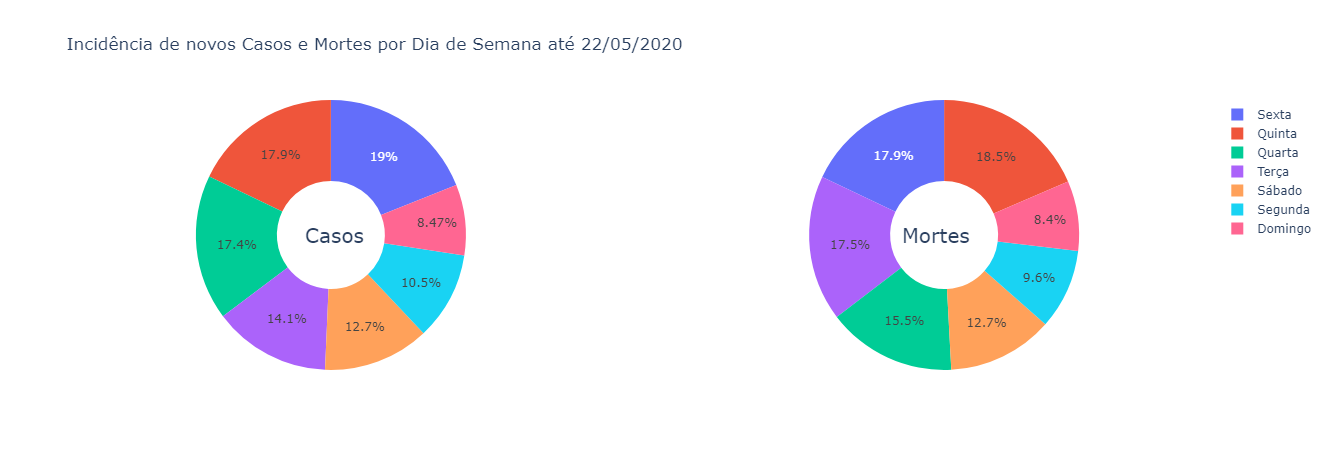

In [25]:
df_dow = df_br.copy()

df_dow["dayofweek"] = df_dow.date.dt.dayofweek
df_dow["new_cases"] = df_dow.new_cases.fillna(1)
df_dow["new_deaths"] = df_dow.new_deaths.fillna(0)

# Cria um DF agregado por Dia da Semana;
df_dow = df_dow.groupby(['dayofweek']).sum()[['new_cases',
                                              'new_deaths']].reset_index()

df_dow['dayofweekformated'] = df_dow.dayofweek.map({0: 'Segunda',
                                                    1: 'Terça',
                                                    2: 'Quarta',
                                                    3: 'Quinta',
                                                    4: 'Sexta',
                                                    5: 'Sábado',
                                                    6: 'Domingo',})

df_dow['mortality'] = df_dow.new_deaths / df_dow.new_cases
df_dow['mortality'].fillna(0, inplace=True)

labels = df_dow.dayofweekformated
values_casos = df_dow.new_cases
values_mortalidade = df_dow.new_deaths

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, 
                     values=values_casos, 
                     name="Casos Confirmados"),
              1, 1)

fig.add_trace(go.Pie(labels=labels, 
                     values=values_mortalidade, 
                     name="Mortes Confirmadas"),
              1, 2)

fig.update_traces(hole=.4,
                  hoverinfo="label+percent+name")

fig.update_layout(
    title_text=f"Incidência de novos Casos e Mortes por Dia de Semana até {max_date_br}",
  annotations=[dict(text='Casos', x=0.20, y=0.5, font_size=20, showarrow=False),
               dict(text='Mortes', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

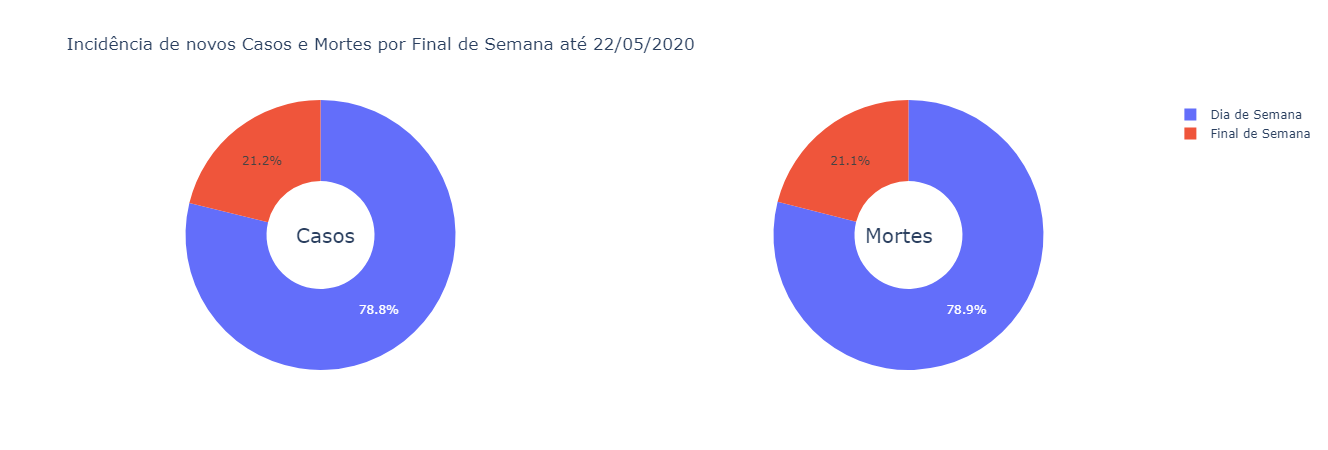

In [26]:
# Copia o DF original.
df_wen = df_br.copy()

# Adiciona a coluna dayofweek.
df_wen["dayofweek"] = df_wen.date.dt.dayofweek

# Preenche os valores nulos.
df_wen["new_cases"] = df_wen.new_cases.fillna(1)
df_wen["new_deaths"] = df_wen.new_deaths.fillna(0)

# Seta o final de semana
df_wen["weekend"] = 0
df_wen.loc[(df_wen.dayofweek == 5) | (df_wen.dayofweek == 6), 'weekend'] = 1

# Agrupa o novo DF.
df_wen = df_wen.groupby(['weekend']).sum()[['new_cases',
                                            'new_deaths']].reset_index()

# Renomeia os valores da coluna weekend.
df_wen["weekend"] = df_wen.weekend.replace({0: 'Dia de Semana',
                                            1: 'Final de Semana'})
# Monta o gráfico.
labels = df_wen.weekend
values_casos = df_wen.new_cases
values_mortalidade = df_wen.new_deaths

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, 
                     values=values_casos, 
                     name="Casos Confirmados"),
              1, 1)

fig.add_trace(go.Pie(labels=labels, 
                     values=values_mortalidade, 
                     name="Mortes Confirmadas"),
              1, 2)

fig.update_traces(hole=.4,
                  hoverinfo="label+percent+name")

fig.update_layout(
    title_text=f"Incidência de novos Casos e Mortes por Final de Semana até {max_date_br}",
  annotations=[dict(text='Casos', x=0.20, y=0.5, font_size=20, showarrow=False),
               dict(text='Mortes', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

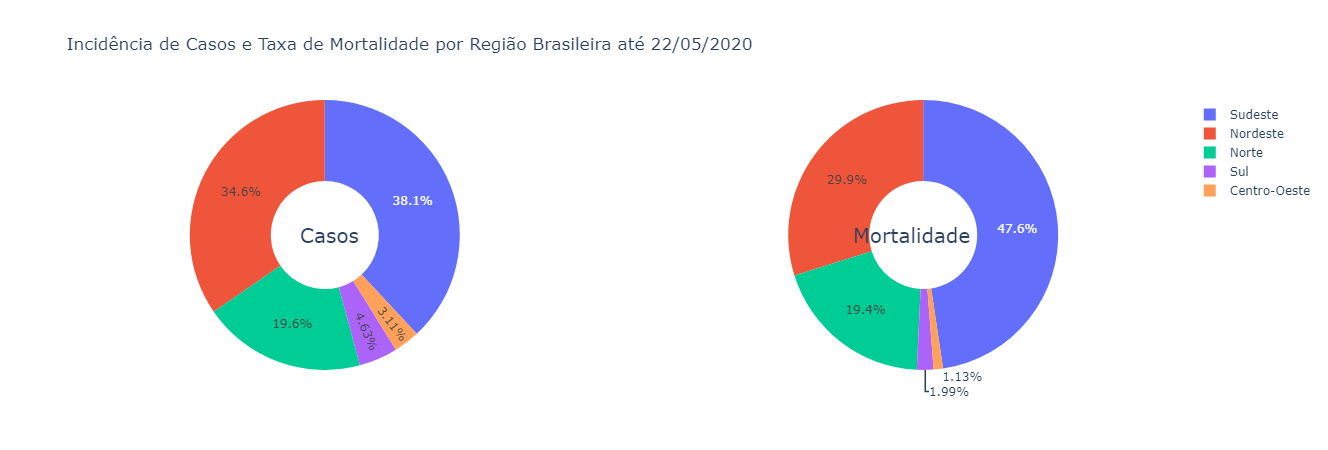

In [27]:
df_reg = df.copy()

# Cria um DF agregado por Data/Região;
df_reg = df_reg.groupby(['date', 'region']).sum()[['cases',
                                         'deaths'
                                       ]].reset_index()

df_reg = df_reg.sort_values(['region', 'date'])

df_reg['new_cases'] = np.where(df_reg.region.eq(df_reg.region.shift()), df_reg.cases.diff(), 1)
df_reg['new_deaths'] = np.where(df_reg.region.eq(df_reg.region.shift()), df_reg.deaths.diff(), 0)

df_reg = df_reg.groupby(['region']).sum()[['new_cases',
                                         'new_deaths'
                                       ]].reset_index()

# Adiciona novas colunas.
df_reg['mortality'] = df_reg.new_deaths  / df_reg.new_cases
df_reg['national_rate'] = df_reg.new_deaths.sum()  / df_reg.new_cases.sum()

labels = df_reg.region
values_casos = df_reg.new_cases
values_mortalidade = df_reg.new_deaths

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[
                            {'type':'domain'}, 
                            {'type':'domain'}
                          ]])

fig.add_trace(go.Pie(labels=labels, 
                     values=values_casos,
                     name="Casos Confirmados"
                     ), 1, 1)

fig.add_trace(go.Pie(labels=labels, 
                     values=values_mortalidade, 
                     name="Taxa de Mortalidade"), 1, 2)

fig.update_traces(hole=.4, 
                  hoverinfo="label+percent+name"
                 )

fig.update_layout(
    title_text=f"Incidência de Casos e Taxa de Mortalidade por Região Brasileira até {max_date_br}",
 
    annotations=[dict(text='Casos', 
                      x=0.20, 
                      y=0.5, 
                      font_size=20, 
                      showarrow=False
                      ),
                 dict(text='Mortalidade', 
                      x=0.82,
                      y=0.5, 
                      font_size=20, 
                      showarrow=False
                      )
                ])

fig.show()

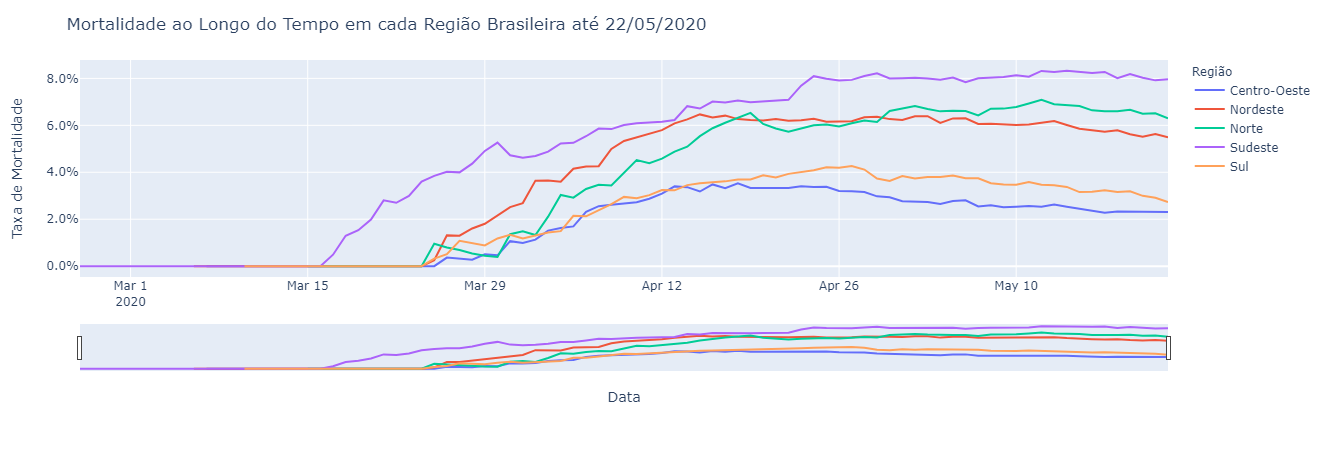

In [28]:
df_reg_dia = df.copy()

# Cria um DF agregado por Data/Região;
df_reg_dia = df_reg_dia.groupby(['date', 'region']).sum()[['cases',
                                                           'deaths', 
                                                           'population']].reset_index()

df_reg_dia = df_reg_dia.sort_values(['region', 'date'])

df_reg_dia['new_cases'] = np.where(df_reg_dia.region.eq(df_reg_dia.region.shift()), df_reg_dia.cases.diff(), 1)
df_reg_dia['new_deaths'] = np.where(df_reg_dia.region.eq(df_reg_dia.region.shift()), df_reg_dia.deaths.diff(), 0)
df_reg_dia['mortality'] = df_reg_dia.deaths / df_reg_dia.cases

fig = px.line(df_reg_dia, 
              x="date", 
              y="mortality", 
              color='region',
              labels={'region': 'Região',
                      'date': 'Data',
                      'mortality': 'Mortalidade',
                     }
             )

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title= f"Mortalidade ao Longo do Tempo em cada Região Brasileira até {max_date_br}",
                  yaxis_title = "Taxa de Mortalidade",
                  xaxis_title = "Data",
                  yaxis_tickformat = '.1%'
                 )

fig.show()

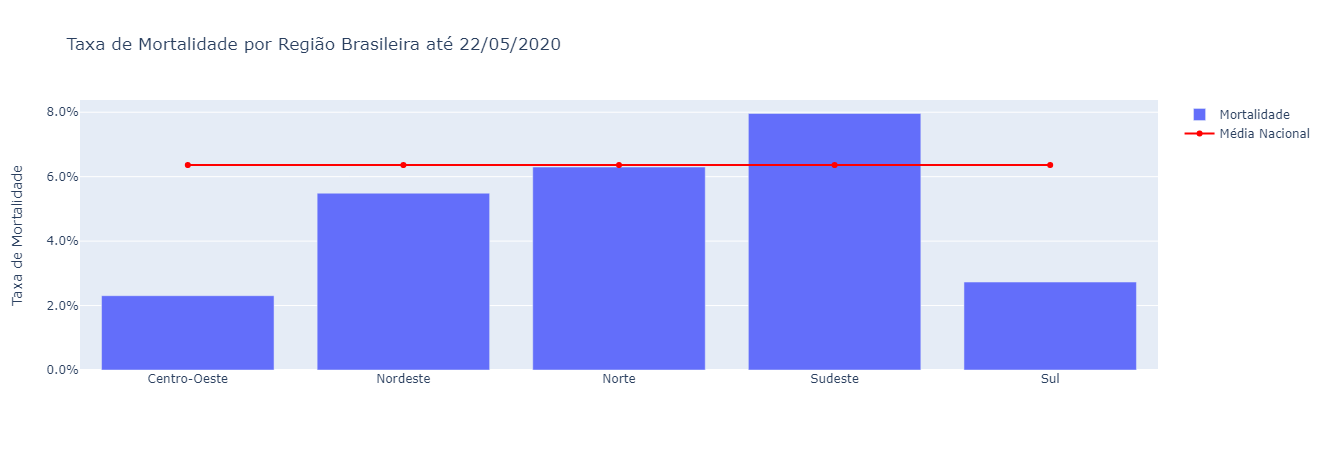

In [29]:
fig = go.Figure(data=[
    go.Bar(name='Mortalidade', x=df_reg['region'], y=df_reg['mortality']),
    go.Scatter(x=df_reg['region'], 
               y=df_reg['national_rate'],
               mode='lines+markers',
               line=dict(color='red'), 
               name='Média Nacional')
])

fig.update_yaxes(title_text='Taxa de Mortalidade')
fig.update_layout(title=f"Taxa de Mortalidade por Região Brasileira até {max_date_br}",
                  yaxis_tickformat = '.1%')

fig.show()

In [30]:
df_est = df.copy()

# Cria um DF agregado por Data/Região;
df_est = df_est.groupby(['date', 'state', 'uf']).sum()[['cases',
                                                        'deaths']].reset_index()

df_est = df_est.sort_values(['date', 'uf'])
df_est = df_est.tail(27)
df_est = df_est.set_index(df_est.uf)
df_est = df_est.drop(['date', 'uf'], axis=1)

# Adiciona novas colunas.
df_est['mortality'] = np.round((df_est.deaths / df_est.cases) * 100, 2)

df_est = df_est.style.background_gradient(cmap='Reds',subset=["cases"])\
                     .background_gradient(cmap='Reds',subset=["deaths"])\
                     .background_gradient(cmap='Reds',subset=["mortality"])\
                     .format("{:.2f}", subset=["mortality"])\

df_est

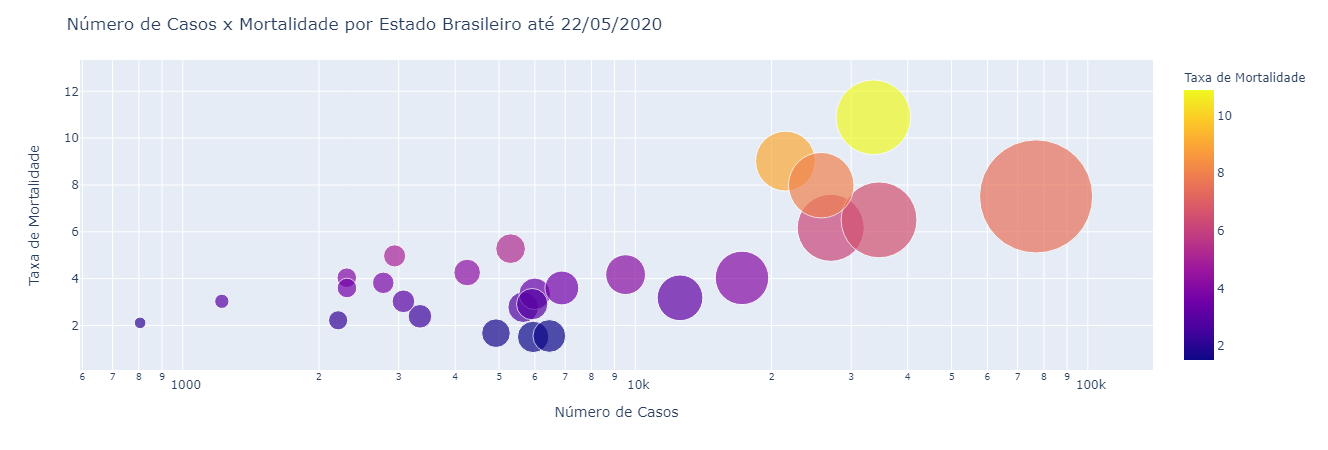

In [31]:
df_est = df.copy()

# Cria um DF agregado por Data/Região;
df_est = df_est.groupby(['date', 'state', 'uf']).sum()[['cases',
                                                        'deaths',
                                                        'population']].reset_index()

df_est = df_est.sort_values(['date', 'uf'])
df_est = df_est.tail(27)
df_est = df_est.set_index(df_est.uf)
df_est = df_est.drop(['date', 'uf'], axis=1)

# Adiciona novas colunas.
df_est['mortality'] = np.round((df_est.deaths / df_est.cases) * 100, 2)
df_est['national_rate'] = df_est.deaths.sum() / df_est.cases.sum()

fig = px.scatter(df_est, 
                 x="cases", 
                 y="mortality", 
                 size="cases", 
                 color=df_est.mortality,
                 hover_name=df_est.state, 
                 log_y=False, 
                 log_x=True, 
                 size_max=80,
                 labels={'cases': 'Casos Confirmados',
                         'mortality': 'Taxa de Mortalidade',
                        }
                )
fig.update_layout(title=f"Número de Casos x Mortalidade por Estado Brasileiro até {max_date_br}",
                  yaxis_title = "Taxa de Mortalidade",
                  xaxis_title = "Número de Casos",
                 )
fig.show()

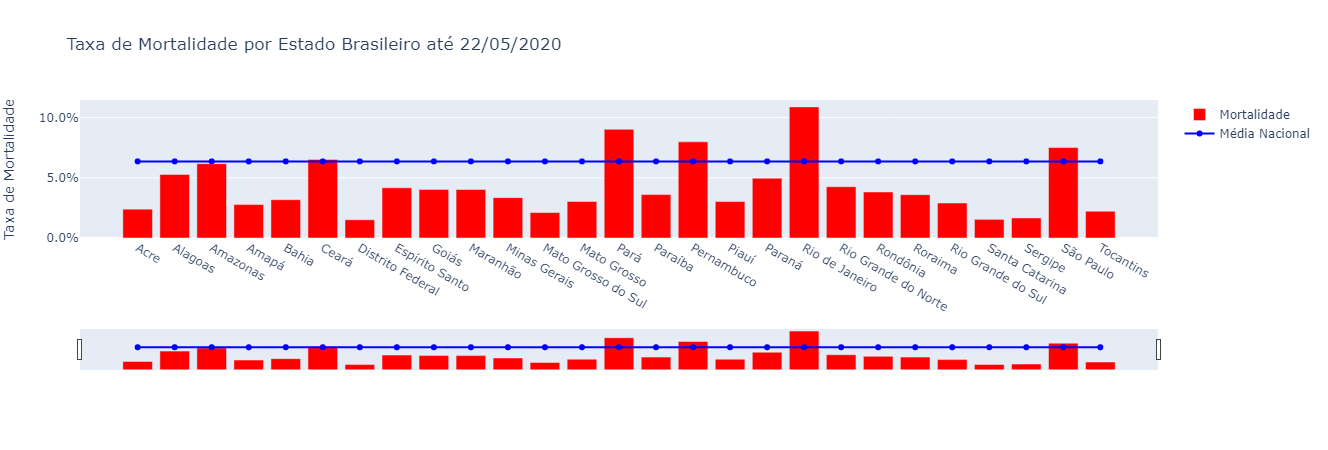

In [32]:
df_est['mortality_unf'] = df_est.deaths / df_est.cases

fig = go.Figure(data=[
    go.Bar(x=df_est['state'], 
           y=df_est['mortality_unf'],
           name='Mortalidade',
           marker_color='red'
          ),
    go.Scatter(x=df_est['state'], 
               y=df_est['national_rate'],
               mode='lines+markers',
               line=dict(color='blue'), 
               name='Média Nacional')
])

fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(title=f"Taxa de Mortalidade por Estado Brasileiro até {max_date_br}",
                  yaxis_title='Taxa de Mortalidade',
                  yaxis_tickformat = '.1%')

fig.show()

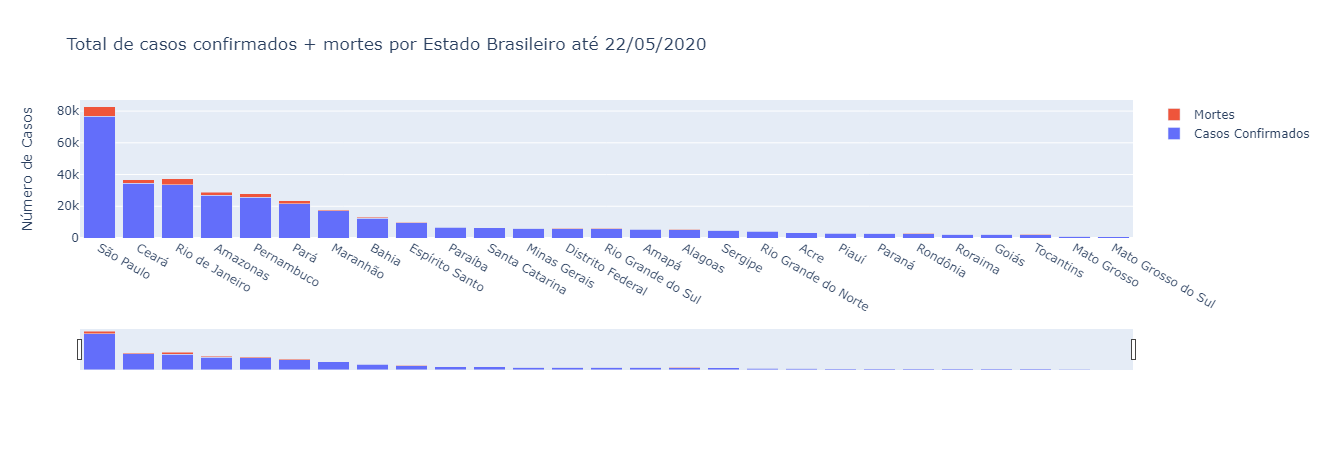

In [33]:
filt = df_est.copy()
filt = filt.sort_values(['cases'], ascending=False)

fig = go.Figure(data=[
    go.Bar(name='Casos Confirmados', x=filt['state'], y=filt['cases']),
    go.Bar(name='Mortes', x=filt['state'], y=filt['deaths'])
])

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title= f"Total de casos confirmados + mortes por Estado Brasileiro até {max_date_br}",
                  yaxis_title='Número de Casos',
                  barmode='stack')

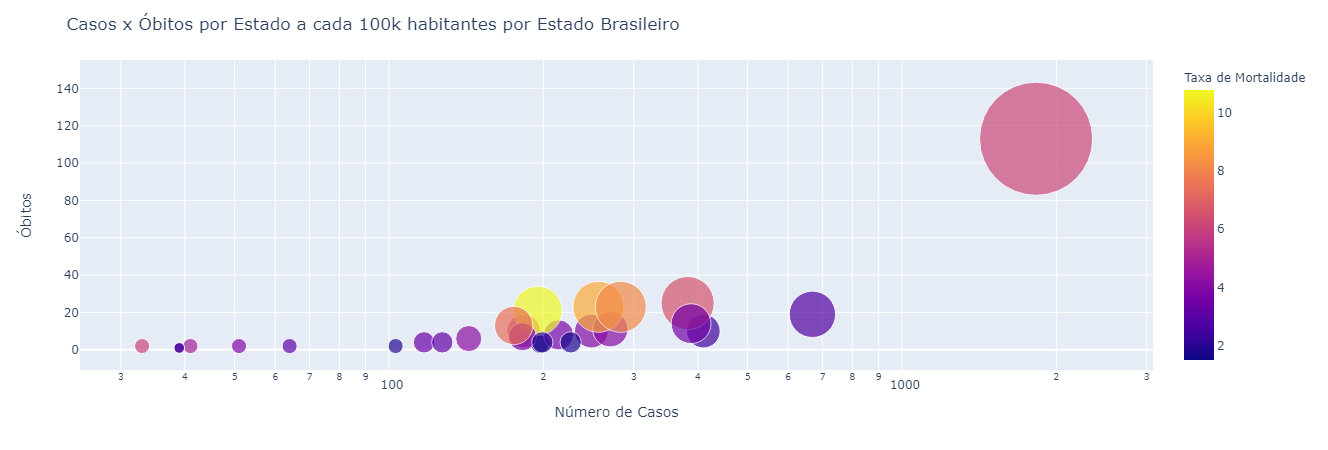

In [34]:
df_est2 = df_est.copy()
df_est2 = df_est2.drop(['mortality', 'mortality_unf'], axis=1)

df_est2['mortality'] = df_est2.deaths / df_est2.cases
df_est2['cases100k'] = round(df_est2.cases / (df_est2.population / 100000))
df_est2['deaths100k'] = round(df_est2.deaths / (df_est2.population / 100000))
df_est2['mortality100k'] = round((df_est2.deaths100k / df_est2.cases100k) * 100, 2)

fig = px.scatter(df_est2, 
                 x="cases100k", 
                 y="deaths100k", 
                 size="deaths100k", 
                 color=df_est2.mortality100k,
                 hover_name=df_est2.state, 
                 log_y=False, 
                 log_x=True, 
                 size_max=80,
                 labels={'cases100k': 'Casos',
                         'deaths100k': 'Óbitos',
                         'mortality100k': 'Taxa de Mortalidade',
                        }
                )
fig.update_layout(title= "Casos x Óbitos por Estado a cada 100k habitantes por Estado Brasileiro",
                  yaxis_title = "Óbitos",
                  xaxis_title = "Número de Casos",
                 )
fig.show()

> # **Mapas de Calor**

**Taxa de Mortalidade por Estado**

In [35]:
from urllib.request import urlopen

# Taxa de Mortalidade
filt = df_est2.copy()

filt.drop(['state',
           'cases',
           'deaths',
           'population',
           'national_rate',
           'cases100k',
           'deaths100k',
           'mortality100k'], axis=1, inplace=True)

filt['UF'] = filt.index
filt['Mortalidade'] = round(filt.mortality * 100, 2)

with urlopen('https://raw.githubusercontent.com/fcampos300/covid19/master/dataset/Brasil.json') as response:
    counties = json.load(response)

fig = px.choropleth_mapbox(filt, 
                           geojson=counties, 
                           locations=filt.UF, 
                           featureidkey="properties.UF",
                           color='Mortalidade',
                           range_color=(0, max(filt.Mortalidade)),
                           mapbox_style="carto-positron",
                           zoom=2.5, 
                           center = {"lat": -15.98, "lon": -49.86}, 
                           # opacity=0.9
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_coloraxes(colorbar_title="Taxa de Mortalidade",colorscale="reds")
fig.show()

**Total de Casos Confirmados por Estado**

In [36]:
# Casos
filt = df_est2.copy()

filt.drop(['state',
           'deaths',
           'population',
           'national_rate',
           'cases100k',
           'deaths100k',
           'mortality',
           'mortality100k'], axis=1, inplace=True)

filt['UF'] = filt.index

fig = px.choropleth_mapbox(filt, 
                           geojson=counties, 
                           locations=filt.UF, 
                           featureidkey="properties.UF",
                           color='cases',
                           mapbox_style="carto-positron",
                           zoom=2.5, 
                           center = {"lat": -15.98, "lon": -49.86}, 
                           # opacity=0.9,
                           labels={'cases':'Casos Confirmados'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  title = 'teste'
                 )
fig.update_coloraxes(colorbar_title="Casos Confirmados", colorscale="blues")
fig.show()

**Total de Mortes por Estado**

In [37]:
# Mortes
filt = df_est2.copy()

filt.drop(['state',
           'cases',
           'population',
           'national_rate',
           'cases100k',
           'deaths100k',
           'mortality',
           'mortality100k'], axis=1, inplace=True)

filt['UF'] = filt.index

fig = px.choropleth_mapbox(filt, 
                           geojson=counties, 
                           locations=filt.UF, 
                           featureidkey="properties.UF",
                           color='deaths',
                           mapbox_style="carto-positron",
                           zoom=2.5, 
                           center = {"lat": -15.98, "lon": -49.86}, 
                           # opacity=0.9,
                           labels={'deaths':'Mortes'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  title = 'teste'
                 )
fig.update_coloraxes(colorbar_title="Mortes", colorscale="reds")
fig.show()

**Total de Casos Confirmados por Estado a cada 100k habitantes**

In [38]:
filt = df_est2.copy()

filt.drop(['state',
           'cases',
           'deaths',
           'population',
           'national_rate',
           'deaths100k',
           'mortality',
           'mortality100k'], axis=1, inplace=True)

filt['UF'] = filt.index

fig = px.choropleth_mapbox(filt, 
                           geojson=counties, 
                           locations=filt.UF, 
                           featureidkey="properties.UF",
                           color='cases100k',
                           mapbox_style="carto-positron",
                           zoom=2.5, 
                           center = {"lat": -15.98, "lon": -49.86}, 
                           # opacity=0.9,
                           labels={'cases100k':'Casos por 100k Habitantes'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  title = 'teste'
                 )
fig.update_coloraxes(colorbar_title="Casos por 100k", colorscale="blues")
fig.show()

**Total de Mortes por Estado a cada 100k Habitantes**

In [39]:
filt = df_est2.copy()

filt.drop(['state',
           'cases',
           'deaths',
           'population',
           'national_rate',
           'cases100k',
           'mortality',
           'mortality100k'], axis=1, inplace=True)

filt['UF'] = filt.index

fig = px.choropleth_mapbox(filt, 
                           geojson=counties, 
                           locations=filt.UF, 
                           featureidkey="properties.UF",
                           color='deaths100k',
                           mapbox_style="carto-positron",
                           zoom=2.5, 
                           center = {"lat": -15.98, "lon": -49.86}, 
                           # opacity=0.9,
                           labels={'deaths100k':'Mortes por 100k Habitantes'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  title = 'teste'
                 )
fig.update_coloraxes(colorbar_title="Mortes por 100k", colorscale="reds")
fig.show()